In [6]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.datasets import fetch_california_housing

In [2]:
! pip install pandas_datareader

Defaulting to user installation because normal site-packages is not writeable


In [12]:
# Load California housing dataset
housing = fetch_california_housing()

In [13]:
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [14]:
X = housing.data
y = housing.target

In [15]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Create Decision Tree Regressor
regressor = DecisionTreeRegressor(random_state=42)

In [17]:
# Optionally: use GridSearchCV to find the best parameters
param_grid = {
    'max_depth': [2, 4, 6, 8, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [18]:
grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid,
                           cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

,estimator,DecisionTreeR...ndom_state=42)
,param_grid,"{'max_depth': [2, 4, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...]}"
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'squared_error'


In [19]:
# Best model from GridSearch
best_regressor = grid_search.best_estimator_

In [20]:
best_regressor

,criterion,'squared_error'
,splitter,'best'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,4
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [21]:
# Make predictions
y_pred = best_regressor.predict(X_test)

In [22]:
# Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)


In [23]:
print("Best Parameters:", grid_search.best_params_)
print("R2 Score:", r2)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
R2 Score: 0.6883380738855668
MAE: 0.4311152226926481
MSE: 0.40840458615620523
RMSE: 0.6390654005312799


      Feature  Importance
0      MedInc    0.617018
5    AveOccup    0.131007
6    Latitude    0.079174
7   Longitude    0.065475
1    HouseAge    0.044928
2    AveRooms    0.037535
4  Population    0.013128
3   AveBedrms    0.011734


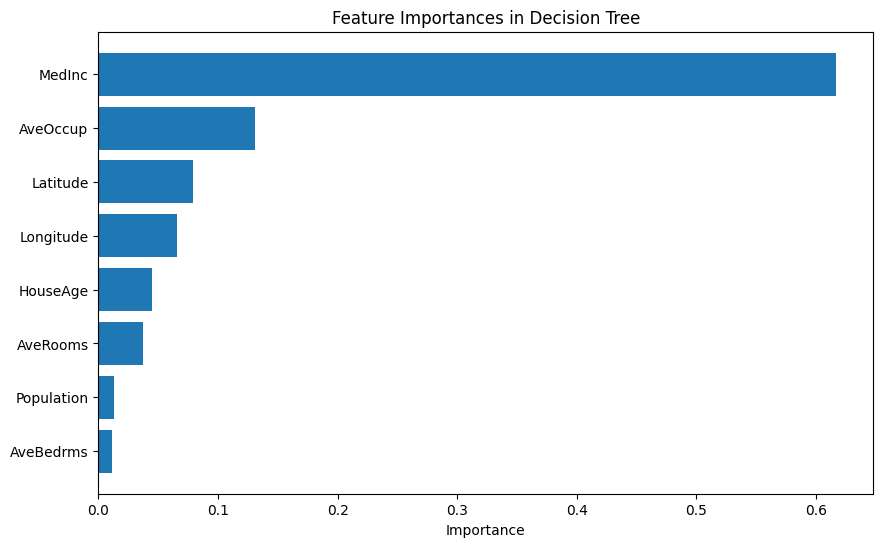

In [24]:
import matplotlib.pyplot as plt

# Get feature importances from the best regressor
importances = best_regressor.feature_importances_
feature_names = housing.feature_names

# Create a DataFrame for easy visualization
feat_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

print(feat_df)

# Optional: Plot feature importances
plt.figure(figsize=(10,6))
plt.barh(feat_df['Feature'], feat_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances in Decision Tree')
plt.gca().invert_yaxis()  # highest importance on top
plt.show()
